<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner code, texte et graphiques.

Cet outil est formidable pour plusieurs raisons:

+ Il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'une instruction, de la corriger si nécessaire.
+ Il permet aussi de rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ Il est possible d'ajouter des graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandé.

Et gardez à l'esprit qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
%pip install pandas

In [ ]:
%pip install plotly

In [ ]:
%pip install matplotlib

In [ ]:
%pip install seaborn

In [ ]:
%pip install nbformat 

In [ ]:
%pip install openpyxl

In [ ]:
%pip install scipy


In [ ]:
#Importation des librairies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nbformat as nbf
import openpyxl as opx
import numpy as np
import re

In [165]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir dans Google les mots clés "display all columns dataframe Pandas" par exemple.
#Dans les résultats de la recherche, privilégier les solutions provenant de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [ ]:
#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")
#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")
#Importation du fichier liaison.xlsx
df_lia = pd.read_excel("liaison.xlsx")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [167]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [168]:
#Consulter le nombre de colonnes
#La nature des données dans chacune des colonnes
#Le nombre de valeurs présentes dans chacune des colonnes

# Consulter le nombre de colonnes
nombre_de_colonnes = df_erp.shape[1]
print(f"Nombre de colonnes : {nombre_de_colonnes}")

# La nature des données dans chacune des colonnes
nature_des_donnees = df_erp.dtypes
print("\nNature des données dans chaque colonne :")
print(nature_des_donnees)

# Le nombre de valeurs présentes dans chacune des colonnes
nombre_de_valeurs = df_erp.count()
print("\nNombre de valeurs présentes dans chaque colonne :")
print(nombre_de_valeurs)


Nombre de colonnes : 6

Nature des données dans chaque colonne :
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

Nombre de valeurs présentes dans chaque colonne :
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [169]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [170]:

# Vérifier s'il y a des doublons dans la colonne product_id 
duplicated_product_ids_erp = df_erp.duplicated(subset='product_id', keep=False)

# Afficher les lignes en doublon s'il y en a
duplicated_rows_erp = df_erp[duplicated_product_ids_erp]
duplicated_rows_erp



,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price


In [171]:
#Afficher les valeurs distinctes de la colonne stock_status
#À quelle(s) autre(s) colonne(s) sont-elles liées ?
# Afficher les valeurs distinctes de la colonne stock_status
valeurs_distinctes_stock_status = df_erp['stock_status'].unique()
print(valeurs_distinctes_stock_status)
# Afficher les autres colonnes liées à chaque valeur de stock_status
colonnes_liees = {valeur: df_erp[df_erp['stock_status'] == valeur].columns.tolist()
                  for valeur in valeurs_distinctes_stock_status}
colonnes_liees

['instock' 'outofstock']


{'instock': ['product_id',
  'onsale_web',
  'price',
  'stock_quantity',
  'stock_status',
  'purchase_price'],
 'outofstock': ['product_id',
  'onsale_web',
  'price',
  'stock_quantity',
  'stock_status',
  'purchase_price']}

In [172]:
#Création d'une colonne "stock_status_2"
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#Si la valeur de la colonne "stock_quantity" est nulle, renseigner "outofstock" sinon mettre "instock"
# Création de la colonne "stock_status_2" en fonction de "stock_quantity"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'instock' if x > 0 else 'outofstock')

# Afficher le DataFrame pour vérifier la nouvelle colonne
df_erp


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
0,3847,1,24.2,16,instock,12.88,instock
1,3849,1,34.3,10,instock,17.54,instock
2,3850,1,20.8,0,outofstock,10.64,outofstock
3,4032,1,14.1,26,instock,6.92,instock
4,4039,1,46.0,3,outofstock,23.77,instock
...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock
821,7204,0,45.0,9,instock,24.18,instock
822,7247,1,54.8,6,instock,27.18,instock
823,7329,0,26.5,14,instock,13.42,instock


In [173]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [174]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
# Comparer les colonnes stock_status et stock_status_2
df_erp['status_match'] = df_erp['stock_status'] == df_erp['stock_status_2']

# Calculer la somme des valeurs True dans la colonne temporaire
somme_correspondances = df_erp['status_match'].sum()

print("Somme des correspondances:", somme_correspondances)

Somme des correspondances: 823


In [175]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous donne ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
# Créer une colonne temporaire pour identifier les écarts
df_erp['status_ecart'] = df_erp['stock_status'] != df_erp['stock_status_2']

# Filtrer et afficher les lignes où il y a un écart
lignes_ecart = df_erp[df_erp['status_ecart']]
print(lignes_ecart)

     product_id  onsale_web  price  stock_quantity stock_status  \
4          4039           1   46.0               3   outofstock   
398        4885           1   18.7               0      instock   

     purchase_price stock_status_2  status_match  status_ecart  
4             23.77        instock         False          True  
398            9.66     outofstock         False          True  


In [176]:
# Mettre à jour les valeurs incohérentes dans 'stock_status'
df_erp.loc[df_erp['stock_status'] != df_erp['stock_status_2'], 'stock_status'] = df_erp['stock_status_2']

# Afficher le DataFrame pour vérifier les modifications
df_erp

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2,status_match,status_ecart
0,3847,1,24.2,16,instock,12.88,instock,True,False
1,3849,1,34.3,10,instock,17.54,instock,True,False
2,3850,1,20.8,0,outofstock,10.64,outofstock,True,False
3,4032,1,14.1,26,instock,6.92,instock,True,False
4,4039,1,46.0,3,instock,23.77,instock,False,True
...,...,...,...,...,...,...,...,...,...
820,7203,0,45.0,30,instock,23.48,instock,True,False
821,7204,0,45.0,9,instock,24.18,instock,True,False
822,7247,1,54.8,6,instock,27.18,instock,True,False
823,7329,0,26.5,14,instock,13.42,instock,True,False


In [177]:
#retester
# Comparer les colonnes stock_status et stock_status_2
df_erp['status_match'] = df_erp['stock_status'] == df_erp['stock_status_2']

# Calculer la somme des valeurs True dans la colonne temporaire
somme_correspondances = df_erp['status_match'].sum()

print("Somme des correspondances:", somme_correspondances)

Somme des correspondances: 825


# STOCK STATUT : 
+ 2 erreurs dans le statut des stocks -> product_id : 4039,4885
+ Verification et remplacement des valeurs non correspondante (création d'une colonne provisioire, vérification des correspondance et remplacement si valeur erronnée)
+ suggestion : vérifier l'origine de ce dysfonctionnement au niveau de la récupération des données de l'ERP


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [178]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatifs ou nuls?
#Afficher le ou les prix non renseignés dans la colonne "price"

#Afficher le prix minimum de la colonne "price"

#Afficher le prix maximum de la colonne "price"

#Afficher les prix inférieurs à 0 (qu'est-ce qu'il faut en faire ?)


# Vérifier et afficher les prix non renseignés dans la colonne "price"
prix_non_renseignes = df_erp[df_erp['price'].isnull()]
print("Prix non renseignés dans la colonne 'price' :")
print(prix_non_renseignes[['product_id', 'price']])

# Afficher le prix minimum de la colonne "price"
prix_minimum = df_erp['price'].min()
print(f"\nPrix minimum de la colonne 'price' : {prix_minimum}")

# Afficher le prix maximum de la colonne "price"
prix_maximum = df_erp['price'].max()
print(f"\nPrix maximum de la colonne 'price' : {prix_maximum}")

# Afficher les prix inférieurs à 0
prix_inferieurs_zero = df_erp[df_erp['price'] < 0]
print("\nPrix inférieurs à 0 dans la colonne 'price' :")
print(prix_inferieurs_zero[['product_id', 'price']])


Prix non renseignés dans la colonne 'price' :
Empty DataFrame
Columns: [product_id, price]
Index: []

Prix minimum de la colonne 'price' : -20.0

Prix maximum de la colonne 'price' : 225.0

Prix inférieurs à 0 dans la colonne 'price' :
     product_id  price
151        4233  -20.0
469        5017   -8.0
739        6594   -9.1


In [179]:
#Remplacement des valeurs negative par zéro
df_erp['price'] = df_erp['price'].clip(lower=0)

# Afficher le prix minimum de la colonne "price"
prix_minimum = df_erp['price'].min()
print(f"\nPrix minimum de la colonne 'price' : {prix_minimum}")


Prix minimum de la colonne 'price' : 0.0


# PRIX :
+ 3 erreurs avec des prix negatifs (product_id : 4233, 5017, 6594)
+ remplacement des prix negatifs par zéro
+ suggestion : réaliser un inventaire


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [180]:
#######################
### stock_quantity  ###
#######################


# Afficher la quantité minimum de la colonne "stock_quantity"
quantite_minimum = df_erp['stock_quantity'].min()
print(f"Quantité minimum de la colonne 'stock_quantity' : {quantite_minimum}")

# Afficher la quantité maximum de la colonne "stock_quantity"
quantite_maximum = df_erp['stock_quantity'].max()
print(f"\nQuantité maximum de la colonne 'stock_quantity' : {quantite_maximum}")

# Afficher les stocks inférieurs à 0
stocks_inferieurs_zero = df_erp[df_erp['stock_quantity'] < 0]
print("\nStocks inférieurs à 0 dans la colonne 'stock_quantity' :")
print(stocks_inferieurs_zero[['product_id', 'stock_quantity']])



Quantité minimum de la colonne 'stock_quantity' : -10

Quantité maximum de la colonne 'stock_quantity' : 145

Stocks inférieurs à 0 dans la colonne 'stock_quantity' :
     product_id  stock_quantity
449        4973             -10
573        5700              -1


In [181]:
#Afficher les stocks inférieurs à 0 (qu'est-ce qu'il faut en faire ?)
# Mettre à jour les valeurs de 'stock_quantity' inférieures à zéro pour les passer à zéro
df_erp.loc[df_erp['stock_quantity'] < 0, 'stock_quantity'] = 0

# Afficher le DataFrame pour vérifier les modifications
print(df_erp)


     product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price stock_status_2  status_match  status_ecart  
0             12.88        instock          True         False  
1             17.54        instock          True         False  


# STOCKS :
+ 2 erreurs de stocks, valeurs negatives (product_id : 4973,5700)
+ remplacement des valeurs negatives par zéro
+ suggestion : réaliser un inventaire

In [309]:
# Définir un seuil pour une faible quantité en stock
seuil_stock_faible = 5

# Identifier les articles avec une faible quantité en stock
articles_stock_faible = df_erp[df_erp['stock_quantity'] < seuil_stock_faible]

# Identifier les articles en rupture de stock
articles_rupture_stock = df_erp[df_erp['stock_status'] == 'outofstock']

# Combiner les résultats
articles_a_surveiller = pd.concat([articles_stock_faible, articles_rupture_stock]).drop_duplicates()

# Afficher les articles à surveiller
print(articles_a_surveiller)

     product_id  onsale_web  price  stock_quantity stock_status  \
2          3850           1   20.8               0   outofstock   
4          4039           1   46.0               3      instock   
8          4043           1   60.0               0   outofstock   
10         4046           1   80.0               2      instock   
11         4047           1   18.3               0   outofstock   
..          ...         ...    ...             ...          ...   
804        7137           0   45.0               3      instock   
805        7159           0   31.0               1      instock   
807        7162           0   27.0               1      instock   
811        7169           0   45.0               3      instock   
816        7195           0   21.0               1      instock   

     purchase_price  
2             10.64  
4             23.77  
8             29.45  
10            40.92  
11             9.93  
..              ...  
804           23.25  
805           16.18

# surveillance des stocks
+ Pour un seuil de stock faible fixé 5 articles, 149 produits sont à surveiller de près.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [182]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient. Que signifient-elles?
# Afficher les valeurs distinctes de la colonne 'onsale_web'
valeurs_onsale_web = df_erp['onsale_web'].unique()
print("Valeurs distinctes de la colonne 'onsale_web' :")
print(valeurs_onsale_web)

#on peut constater qu'il existe deux valeurs possibles: 0 ou 1
# on peut donc supposer que cette valeur indique si le produit est en vente sur le web (1) ou non (0)------------------



Valeurs distinctes de la colonne 'onsale_web' :
[1 0]


In [183]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
# Supprimer la colonne 'stock_status_2'
df_erp = df_erp.drop(columns=['stock_status_2'])

#Suppression des colonnes temporaires statud_match et status_ecart
df_erp = df_erp.drop(columns=['status_match'])
df_erp = df_erp.drop(columns=['status_ecart'])



In [184]:
# Afficher le DataFrame pour vérifier la suppression de la colonne
print(df_erp)

     product_id  onsale_web  price  stock_quantity stock_status  \
0          3847           1   24.2              16      instock   
1          3849           1   34.3              10      instock   
2          3850           1   20.8               0   outofstock   
3          4032           1   14.1              26      instock   
4          4039           1   46.0               3      instock   
..          ...         ...    ...             ...          ...   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   
822        7247           1   54.8               6      instock   
823        7329           0   26.5              14      instock   
824        7338           1   16.3              40      instock   

     purchase_price  
0             12.88  
1             17.54  
2             10.64  
3              6.92  
4             23.77  
..              ...  
820           23.48  
821           24.18

In [185]:
#Quelles sont les colonnes à conserver selon vous?
#toutes, cependant nous pourrions isoler les valeurs onsales_web pour ne se concentrer que sur les produits en vente sur le web
#df_filtered = df_erp[df_erp['onsale_web'] == 1]

In [186]:
#Afficher les dimensions du dataset df_erp--------------------------------------------------------------
print("Le tableau df_erp comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))

#Afficher les dimensions du dataset df_filtered
#print("Le tableau df_filtered comporte {} observation(s) ou article(s)".format(df_filtered.shape[0]))


Le tableau df_erp comporte 825 observation(s) ou article(s)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [187]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 
# Afficher les prix non renseignés dans la colonne "purchase_price"
prix_non_renseignes = df_erp[df_erp['purchase_price'].isnull()]
print("Prix non renseignés dans la colonne 'purchase_price' :")
print(prix_non_renseignes[['product_id', 'purchase_price']])

# Afficher le prix minimum de la colonne "purchase_price"
prix_minimum = df_erp['purchase_price'].min()
print(f"\nPrix minimum de la colonne 'purchase_price' : {prix_minimum}")

# Afficher le prix maximum de la colonne "purchase_price"
prix_maximum = df_erp['purchase_price'].max()
print(f"\nPrix maximum de la colonne 'purchase_price' : {prix_maximum}")


Prix non renseignés dans la colonne 'purchase_price' :
Empty DataFrame
Columns: [product_id, purchase_price]
Index: []

Prix minimum de la colonne 'purchase_price' : 2.74

Prix maximum de la colonne 'purchase_price' : 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [188]:
# Dimension du dataset
dimensions = df_web.shape

# Nombre d'observations (lignes)
nombre_observations = dimensions[0]

# Nombre de caractéristiques (colonnes)
nombre_caracteristiques = dimensions[1]

print(f"Dimension du dataset : {dimensions}")
print(f"Nombre d'observations : {nombre_observations}")
print(f"Nombre de caractéristiques : {nombre_caracteristiques}")



Dimension du dataset : (1513, 29)
Nombre d'observations : 1513
Nombre de caractéristiques : 29


In [189]:
# Nombre de colonnes
nombre_colonnes = df_web.shape[1]

# Nature des données et nombre de valeurs présentes dans chacune des colonnes
info_colonnes = pd.DataFrame({
    'Type de données': df_web.dtypes,
    'Nombre de valeurs non nulles': df_web.count()
})

print(f"Nombre de colonnes : {nombre_colonnes}")
print("\nInformation sur les colonnes :")
print(info_colonnes)



Nombre de colonnes : 29

Information sur les colonnes :
                      Type de données  Nombre de valeurs non nulles
sku                            object                          1428
virtual                         int64                          1513
downloadable                    int64                          1513
rating_count                    int64                          1513
average_rating                float64                          1430
total_sales                   float64                          1430
tax_status                     object                           716
tax_class                     float64                             0
post_author                   float64                          1430
post_date              datetime64[ns]                          1430
post_date_gmt          datetime64[ns]                          1430
post_content                  float64                             0
product_type                   object                       

In [190]:
#Selon vous, quelles sont les colonnes à conserver ?
#sku,total_sales,tax_status,post_type,post_title


In [191]:
# Liste des colonnes à conserver
colonnes_a_conserver = ['sku', 'total_sales', 'tax_status', 'post_type','post_title','product_type']

# filtrage
df_web = df_web[colonnes_a_conserver]

# Afficher les premières lignes du DataFrame pour vérifier
print("Aperçu de df_web après suppression des colonnes inutiles:")
print(df_web.head())



Aperçu de df_web après suppression des colonnes inutiles:
     sku  total_sales tax_status   post_type  \
0  11862          3.0        NaN  attachment   
1  16057          5.0        NaN  attachment   
2  14692          5.0    taxable     product   
3  16295         14.0        NaN  attachment   
4  15328          2.0    taxable     product   

                                          post_title product_type  
0                  Gilles Robin Hermitage Rouge 2012          Vin  
1  Domaine Pellé Sancerre Rouge La Croix Au Garde...          Vin  
2      Château Fonréaud Bordeaux Blanc Le Cygne 2016          Vin  
3  Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...          Vin  
4               Agnès Levet Côte Rôtie Maestria 2017          Vin  


In [192]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
# Afficher les valeurs uniques de la colonne 'sku'
valeurs_sku = df_web['sku'].unique()

# Afficher les valeurs uniques pour inspection
print("Valeurs uniques de la colonne 'sku' :")
print(valeurs_sku)

# Afficher le nombre de valeurs uniques
print("\nNombre de valeurs uniques dans 'sku' :", len(valeurs_sku))


Valeurs uniques de la colonne 'sku' :
[11862 16057 14692 16295 15328 15471 16515 16246 nan 13572 16513 16585
 16269 15526 12869 15575 11586 14338 15425 16560 15361 13809 11587 15022
 14323 16342 16029 15475 13754 14680 15875 9636 13849 13662 16564 13557
 15429 14712 15032 15481 15448 16580 15441 804 15300 13958 16071 15678
 13895 15711 12882 16053 13766 16247 12640 15292 15476 15670 16189 16038
 14864 16044 15324 15531 15953 15413 15733 14366 15895 15892 16472 15185
 16010 15793 15849 12315 15741 15934 15148 15781 15659 15106 15490 14507
 14149 16307 13736 14090 16037 15758 14661 12587 15337 15489 15201 16305
 16131 13435 15747 12203 14509 14768 16262 14561 16505 15717 16129 13460
 15871 15940 11602 13127 13520 15480 13032 15436 15269 15910 19821 16263
 15138 15146 15126 15482 16186 13905 16540 15856 15677 14700 15325 19815
 3506 16056 14975 15341 15204 15415 16065 15479 16151 15127 15140 15779
 15473 15530 14805 14106 9937 15281 16553 15315 15668 13211 15161 11258
 16296 12588 15792 1

In [193]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les
#certaines valeurs ne semblent pas être des nombres

# Fonction pour vérifier si une valeur est un nombre
def is_number(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

# Identifier les valeurs qui ne sont pas des nombres
non_numeric_values = df_web[~df_web['sku'].apply(is_number)]

# Afficher les valeurs non numériques
print("Valeurs non numériques dans la colonne 'sku' :")
print(non_numeric_values['sku'].unique())

Valeurs non numériques dans la colonne 'sku' :
['13127-1' 'bon-cadeau-25-euros']


In [194]:
# Identifier les lignes sans code article dans la colonne 'sku'
lignes_sans_sku = df_web[df_web['sku'].isnull() | (df_web['sku'].astype(str).str.strip() == '')]

# Afficher les lignes sans code article
print("Lignes sans code article dans la colonne 'sku' :")
print(lignes_sans_sku)


Lignes sans code article dans la colonne 'sku' :
      sku  total_sales tax_status post_type post_title product_type
8     NaN          NaN        NaN       NaN        NaN          NaN
20    NaN          NaN        NaN       NaN        NaN          NaN
30    NaN          NaN        NaN       NaN        NaN          NaN
37    NaN          NaN        NaN       NaN        NaN          NaN
41    NaN          NaN        NaN       NaN        NaN          NaN
...   ...          ...        ...       ...        ...          ...
1384  NaN          NaN        NaN       NaN        NaN          NaN
1429  NaN          NaN        NaN       NaN        NaN          NaN
1432  NaN          NaN        NaN       NaN        NaN          NaN
1445  NaN          NaN        NaN       NaN        NaN          NaN
1457  NaN          NaN        NaN       NaN        NaN          NaN

[85 rows x 6 columns]


In [195]:
#Les lignes sans code article semblent être toutes non renseignées----------------------------
#Pour s'en assurer, réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
df_sans_sku = df_web[df_web['sku'].isnull() | (df_web['sku'].astype(str).str.strip() == '')]
#2 - Utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeurs renseignées dans chacune des colonnes
info_sans_sku = df_sans_sku.info()
# Afficher les informations
print("Informations sur le DataFrame des lignes sans code article :")
print(info_sans_sku)
#3 - Que constatez-vous?



<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   2 non-null      float64
 2   tax_status    2 non-null      object 
 3   post_type     2 non-null      object 
 4   post_title    2 non-null      object 
 5   product_type  2 non-null      object 
dtypes: float64(1), object(5)
memory usage: 4.6+ KB
Informations sur le DataFrame des lignes sans code article :
None


In [196]:
#Pour les codes articles identifiés, réaliser une analyse et définir l'action à entreprendre

#supprimer les lignes sans sku------------------------------------
df_web = df_web.dropna(subset=['sku'])

# Afficher le DataFrame après suppression des codes non conformes
print("\nDataFrame après suppression des codes non conformes :")
df_web



DataFrame après suppression des codes non conformes :


,sku,total_sales,tax_status,post_type,post_title,product_type
0,11862,3.0,NaN,attachment,Gilles Robin Hermitage Rouge 2012,Vin
1,16057,5.0,NaN,attachment,Domaine Pellé Sancerre Rouge La Croix Au Garde...,Vin
2,14692,5.0,taxable,product,Château Fonréaud Bordeaux Blanc Le Cygne 2016,Vin
3,16295,14.0,NaN,attachment,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,Vin
4,15328,2.0,taxable,product,Agnès Levet Côte Rôtie Maestria 2017,Vin
...,...,...,...,...,...,...
1508,16326,5.0,taxable,product,Camin Larredya Jurançon Moelleux Au Capcéu 2018,Vin
1509,15662,15.0,taxable,product,Chermette Domaine du Vissoux Beaujolais Griott...,Vin
1510,15329,3.0,NaN,attachment,Agnès Levet Côte Rôtie Péroline 2017,Vin
1511,14827,7.0,NaN,attachment,Marc Colin Et Fils Chassagne-Montrachet Blanc ...,Vin


In [197]:
#La clé pour chaque ligne est-elle unique? autrement dit, y a-t-il des doublons?
# Vérifier s'il y a des doublons dans la colonne 'sku'
doublons_sku = df_web[df_web.duplicated('sku', keep=False)]

# Afficher les doublons s'il y en a
if not doublons_sku.empty:
    print("Il y a des doublons dans la colonne 'sku' :")
    print(doublons_sku['sku'])
else:
    print("Il n'y a pas de doublons dans la colonne 'sku'.")


Il y a des doublons dans la colonne 'sku' :
0       11862
1       16057
2       14692
3       16295
4       15328
        ...  
1508    16326
1509    15662
1510    15329
1511    14827
1512    16004
Name: sku, Length: 1428, dtype: object


In [198]:
#identification sur un exemple de données
print(df_web[df_web['sku'] == 13127])
#attachement est strictement identique à l'exception des données sur l'article correspondant au produit

       sku  total_sales tax_status   post_type  \
123  13127          5.0    taxable     product   
713  13127          5.0        NaN  attachment   

                                       post_title product_type  
123  Clos du Mont-Olivet Châteauneuf-du-Pape 2012          Vin  
713  Clos du Mont-Olivet Châteauneuf-du-Pape 2012          Vin  


In [199]:
#je supprime les lignes dont la valeur est 'attachement'
df_web = df_web[df_web['post_type'] != 'attachment']
df_web

,sku,total_sales,tax_status,post_type,post_title,product_type
2,14692,5.0,taxable,product,Château Fonréaud Bordeaux Blanc Le Cygne 2016,Vin
4,15328,2.0,taxable,product,Agnès Levet Côte Rôtie Maestria 2017,Vin
6,16515,10.0,taxable,product,Château Turcaud Bordeaux Rouge Cuvée Majeure 2018,Vin
11,16585,15.0,taxable,product,Xavier Frissant Touraine Sauvignon 2019,Vin
14,12869,7.0,taxable,product,Stéphane Tissot Arbois D.D. 2016,Vin
...,...,...,...,...,...,...
1503,13074,4.0,taxable,product,Château de Vaudieu Châteauneuf-du-Pape L'Avenu...,Vin
1505,16322,0.0,taxable,product,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,Vin
1507,12365,10.0,taxable,product,Parés Baltà Penedès Electio 2013,Vin
1508,16326,5.0,taxable,product,Camin Larredya Jurançon Moelleux Au Capcéu 2018,Vin


# WEB :
+ 2 sku incohérants ('13127-1' 'bon-cadeau-25-euros')
+ 85 lignes sans sku
+ suppression des lignes sans sku
+ toutes les lignes sont doublées, la valeur "attachment" les différencies.
+ suppression des lignes "attachment"
+ optimiser la récupération des données « web » pour ne récupérer que les valeurs des produits


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [200]:
# Dimension du dataset
dimension_df_lia = df_lia.shape

# Nombre d'observations
nombre_observations_df_lia = dimension_df_lia[0]

# Nombre de caractéristiques
nombre_caracteristiques_df_lia = dimension_df_lia[1]

dimension_df_lia, nombre_observations_df_lia, nombre_caracteristiques_df_lia


((825, 2), 825, 2)

In [201]:
# Nombre de colonnes
nombre_colonnes = df_lia.shape[1]

# Nature des données et nombre de valeurs présentes dans chacune des colonnes
info_colonnes = pd.DataFrame({
    'Type de données': df_lia.dtypes,
    'Nombre de valeurs non nulles': df_lia.count()
})

print("Nombre de colonnes :", nombre_colonnes)
print("\nInformation sur les colonnes :")
print(info_colonnes)



Nombre de colonnes : 2

Information sur les colonnes :
           Type de données  Nombre de valeurs non nulles
id_web              object                           734
product_id           int64                           825


In [202]:
#Les valeurs de la colonne "product_id" sont-elles toutes uniques?
# Vérifier si toutes les valeurs dans la colonne 'product_id' sont uniques
valeurs_product_id_uniques = df_lia['product_id'].is_unique

# Afficher le résultat
valeurs_product_id_uniques

True

In [203]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
# Vérifier si toutes les valeurs dans la colonne 'id_web' sont uniques
valeurs_id_web_uniques = df_lia['id_web'].is_unique

# Afficher le résultat
valeurs_id_web_uniques


False

In [204]:
#Avons-nous des articles sans correspondance?
# Identifier les articles sans correspondance en vérifiant les valeurs manquantes dans 'id_web'
articles_sans_correspondance = df_lia[df_lia['id_web'].isnull()]

# Afficher les articles sans correspondance
print("Articles sans correspondance :")
print(articles_sans_correspondance)


Articles sans correspondance :
    id_web  product_id
19     NaN        4055
49     NaN        4090
50     NaN        4092
119    NaN        4195
131    NaN        4209
..     ...         ...
817    NaN        7196
818    NaN        7200
819    NaN        7201
820    NaN        7203
821    NaN        7204

[91 rows x 2 columns]


In [205]:
#------------------------------------------------
# Supprimer les articles sans correspondance en supprimant les lignes avec des valeurs manquantes dans 'id_web'
df_lia = df_lia.dropna(subset=['id_web'])

# Afficher le DataFrame après suppression des articles sans correspondance
print("DataFrame après suppression des articles sans correspondance :")
print(df_lia)

DataFrame après suppression des articles sans correspondance :
      id_web  product_id
0      15298        3847
1      15296        3849
2      15300        3850
3      19814        4032
4      19815        4039
..       ...         ...
792    15891        7023
793    15887        7025
822  13127-1        7247
823  14680-1        7329
824    16230        7338

[734 rows x 2 columns]


# LIAISON :
+ 91 articles sans correspondances
+ suppression des articles sans correspondances

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [206]:
#Fusion des fichiers df_erp et df_liaison
# Effectuer la fusion des DataFrames df_erp et df_liaison sur la colonne 'product_id'
df_merge = pd.merge(df_erp, df_lia, on='product_id', how='outer', indicator = True)

# Afficher les premières lignes du DataFrame résultant pour vérifier la fusion
print("Aperçu du DataFrame après fusion :")
print(df_merge.head())


Aperçu du DataFrame après fusion :
   product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        3847           1   24.2              16      instock           12.88   
1        3849           1   34.3              10      instock           17.54   
2        3850           1   20.8               0   outofstock           10.64   
3        4032           1   14.1              26      instock            6.92   
4        4039           1   46.0               3      instock           23.77   

  id_web _merge  
0  15298   both  
1  15296   both  
2  15300   both  
3  19814   both  
4  19815   both  


In [207]:
df_merge[df_merge["_merge"] != "both"]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
19,4055,0,86.1,0,outofstock,37.88,NaN,left_only
49,4090,0,73.0,0,outofstock,33.79,NaN,left_only
50,4092,0,47.0,0,outofstock,25.25,NaN,left_only
119,4195,0,14.1,0,outofstock,7.36,NaN,left_only
131,4209,0,73.5,0,outofstock,33.01,NaN,left_only
...,...,...,...,...,...,...,...,...
817,7196,0,31.0,55,instock,31.20,NaN,left_only
818,7200,0,31.0,6,instock,15.54,NaN,left_only
819,7201,0,31.0,18,instock,16.02,NaN,left_only
820,7203,0,45.0,30,instock,23.48,NaN,left_only


In [208]:
#Y a t-il des lignes ne "matchant" pas entre les 2 fichiers?
# Effectuer une jointure de type "outer" pour inclure toutes les lignes des deux DataFrames
df_merged_outer = pd.merge(df_erp, df_lia, on='product_id', how='outer', indicator=True)

# Identifier les lignes qui ne "matchent" pas
lignes_non_matchantes = df_merged_outer[df_merged_outer['_merge'] != 'both']

# Afficher les lignes qui ne "matchent" pas
print("Lignes qui ne matchent pas entre les deux fichiers :")
print(lignes_non_matchantes)


Lignes qui ne matchent pas entre les deux fichiers :
     product_id  onsale_web  price  stock_quantity stock_status  \
19         4055           0   86.1               0   outofstock   
49         4090           0   73.0               0   outofstock   
50         4092           0   47.0               0   outofstock   
119        4195           0   14.1               0   outofstock   
131        4209           0   73.5               0   outofstock   
..          ...         ...    ...             ...          ...   
817        7196           0   31.0              55      instock   
818        7200           0   31.0               6      instock   
819        7201           0   31.0              18      instock   
820        7203           0   45.0              30      instock   
821        7204           0   45.0               9      instock   

     purchase_price id_web     _merge  
19            37.88    NaN  left_only  
49            33.79    NaN  left_only  
50            25.25   

# df_merge : 
+ jointure outer
+ 91 lignes ne matchent pas


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [209]:
#Fusionner les datasets df_merge et df_web
# Effectuer la fusion des DataFrames df_merge et df_web
df_final = pd.merge(df_merge, df_web, left_on='id_web', right_on='sku', how='outer')

#Dois-je supprimer les doublons ?-----------------------------
# Supprimer les doublons dans df_final
#df_final = df_final.drop_duplicates(subset=['product_id', 'sku'])

# Afficher les premières lignes du DataFrame résultant pour vérifier la fusion
print("Aperçu du DataFrame après fusion :")
print(df_final.head())


Aperçu du DataFrame après fusion :
   product_id  onsale_web  price  stock_quantity stock_status  purchase_price  \
0        4729           1    8.6              26      instock            4.22   
1        4634           1   41.0              11      instock           20.12   
2        4141           1   39.0             123      instock           24.86   
3        5932           1   59.9              13      instock           27.18   
4        5047           1   22.5              76      instock           13.78   

  id_web _merge  sku  total_sales tax_status post_type  \
0     38   both   38         10.0    taxable   product   
1     41   both   41          6.0    taxable   product   
2    304   both  304          8.0    taxable   product   
3    523   both  523          0.0    taxable   product   
4    531   both  531          8.0    taxable   product   

                                          post_title product_type  
0         Emile Boeckel Crémant Brut Blanc de Blancs         

In [210]:
#Avons-nous des lignes sans correspondance?
# Vérifier les lignes sans correspondance en identifiant les valeurs manquantes dans les colonnes de df_web
lignes_sans_correspondance = df_final[df_final['sku'].isnull()]

# Afficher les lignes sans correspondance
if lignes_sans_correspondance.empty:
    print("Toutes les lignes ont une correspondance.")
else:
    print("Lignes sans correspondance :")
    print(lignes_sans_correspondance)



Lignes sans correspondance :
     product_id  onsale_web  price  stock_quantity stock_status  \
81         4741           0   12.4               0   outofstock   
127        5957           0   39.0               0   outofstock   
139        4289           0   22.8               0   outofstock   
180        4869           0   17.2               0   outofstock   
185        5955           0   27.3               0   outofstock   
..          ...         ...    ...             ...          ...   
820        7196           0   31.0              55      instock   
821        7200           0   31.0               6      instock   
822        7201           0   31.0              18      instock   
823        7203           0   45.0              30      instock   
824        7204           0   45.0               9      instock   

     purchase_price id_web     _merge  sku  total_sales tax_status post_type  \
81             6.66  12601       both  NaN          NaN        NaN       NaN   
127   

In [211]:
# Supprimer les lignes sans correspondance (où 'sku' est NaN)
df_final = df_final.dropna(subset=['sku'])

# Afficher un message indiquant que les lignes sans correspondance ont été supprimées
print("Les lignes sans correspondance ont été supprimées.")
print(df_final)


Les lignes sans correspondance ont été supprimées.
     product_id  onsale_web  price  stock_quantity stock_status  \
0          4729           1    8.6              26      instock   
1          4634           1   41.0              11      instock   
2          4141           1   39.0             123      instock   
3          5932           1   59.9              13      instock   
4          5047           1   22.5              76      instock   
..          ...         ...    ...             ...          ...   
728        5561           1   58.0               8      instock   
729        5563           1   58.0              16      instock   
730        5565           1   92.0               0   outofstock   
731        7247           1   54.8               6      instock   
733        4954           1   25.0              23      instock   

     purchase_price               id_web _merge                  sku  \
0              4.22                   38   both                   38   


#df_final :
+ 111 lignes sans correspondances
+ suppression des lignes sans correspondances
+ 714 produits identifiés

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univariée des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

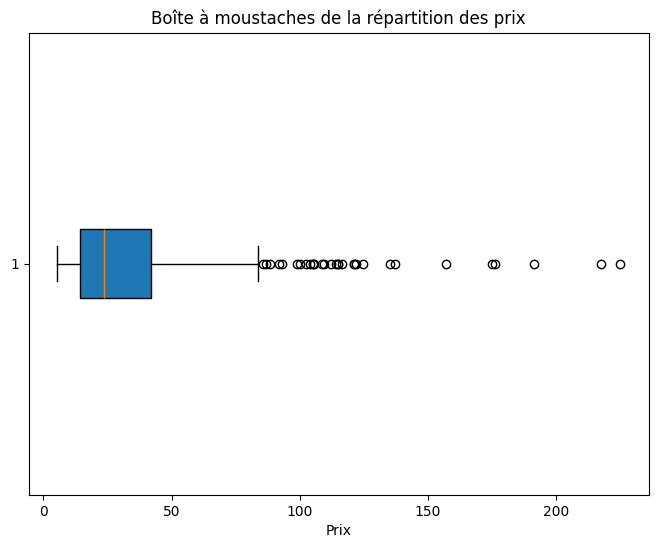

In [212]:
price_data = df_final['price']

# Créer une boîte à moustaches
plt.figure(figsize=(8, 6))
plt.boxplot(price_data, vert=False, patch_artist=True)

# Ajouter des titres et des labels
plt.title('Boîte à moustaches de la répartition des prix')
plt.xlabel('Prix')

# Afficher le graphique
plt.show()


In [213]:
#Autre méthode avec plotly express
import plotly.express as px

fig = px.box(df_final, y='price', title='Boîte à moustaches de la répartition des prix')

# Afficher le graphique
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistiques</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [214]:
from scipy import stats

# Calculer la moyenne du prix
moyenne_prix = df_final['price'].mean()

# Calculer l'écart-type du prix
ecart_type_prix = df_final['price'].std()

# Calculer le Z-score des prix
z_scores = stats.zscore(df_final['price'])

# Afficher les résultats
print("Moyenne du prix :", moyenne_prix)
print("Écart-type du prix :", ecart_type_prix)
print("Z-scores des prix :")
print(z_scores)



Moyenne du prix : 32.33368347338936
Écart-type du prix : 27.5963324191972
Z-scores des prix :
[-8.60633247e-01  3.14258852e-01  2.41734649e-01  9.99612577e-01
 -3.56590032e-01  1.61244210e+00  1.09026783e+00  1.09026783e+00
  2.63491910e-01  7.27646813e-01  9.41593214e-01  7.45777864e-01
  7.27646813e-01 -1.02755319e-01  1.87341496e-01  9.66976686e-01
  6.04355667e-01  6.40617769e-01  6.40617769e-01  7.27646813e-01
 -4.65376337e-01  1.09389404e+00  2.76195073e+00  2.59877127e+00
  5.20964260e+00 -7.37342101e-01  1.83726713e+00 -6.53939267e-01
  9.88733947e-01 -2.15167834e-01  3.57773375e-01  1.32959770e+00
  6.04355667e-01  4.52066267e+00 -6.14050955e-01 -3.74721082e-01
 -7.98987674e-01  9.88733947e-01  2.41734649e-01  1.07576299e+00
 -2.40551306e-01  1.32948343e-01  1.27520455e+00  4.23045158e-01
  3.86783056e-01  9.66976686e-01  6.22486718e-01 -6.97453789e-01
 -3.02196879e-01  6.22486718e-01  6.22486718e-01  6.22486718e-01
 -1.75279522e-01  2.41746076e+00  2.63503337e+00  7.49404075e

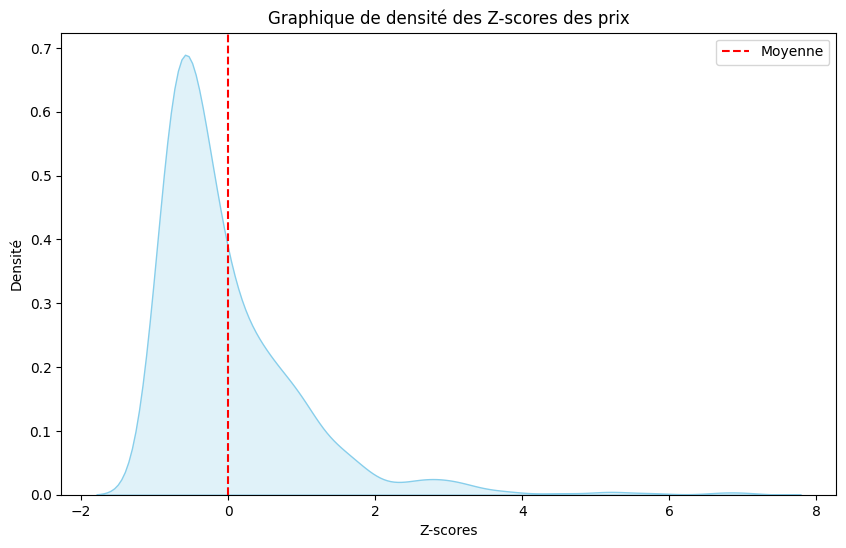

In [236]:
# Créer un graphique de densité des Z-scores
plt.figure(figsize=(10, 6))
sns.kdeplot(z_scores, fill=True, color='skyblue')
plt.title('Graphique de densité des Z-scores des prix')
plt.xlabel('Z-scores')
plt.ylabel('Densité')
plt.axvline(x=0, color='red', linestyle='--', label='Moyenne')
plt.legend()
plt.show()

In [215]:
#Quel est le seuil prix dont le z-score est supérieur à 3?

# Calculer le Z-score des prix
df_final['z_score'] = stats.zscore(df_final['price'])

# Filtrer les prix dont le z-score est supérieur à 3
prix_zscore_sup_3 = df_final[df_final['z_score'] > 3]['price']

# Trouver le seuil minimum parmi ces prix
seuil_prix = prix_zscore_sup_3.min()

print("Seuil de prix dont le z-score est supérieur à 3 :", seuil_prix)


Seuil de prix dont le z-score est supérieur à 3 : 116.4


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'intervalle interquartile</h3>
</div>

In [216]:
#Utilisation de la fonction "describe" de Pandas pour l'étude des mesures de dispersion
# Utiliser la fonction describe pour obtenir un résumé statistique des prix
description_prix = df_final['price'].describe()

# Afficher le résumé statistique
print(description_prix)


count    714.000000
mean      32.333683
std       27.596332
min        5.200000
25%       14.062500
50%       23.450000
75%       42.075000
max      225.000000
Name: price, dtype: float64


In [217]:
#Définir un seuil pour les articles "outliers" en prix
# Calculer Q1 et Q3
Q1 = df_final['price'].quantile(0.25)
Q3 = df_final['price'].quantile(0.75)

# Calculer l'écart interquartile (IQR)
IQR = Q3 - Q1

# Définir les limites pour les valeurs aberrantes
limite_inf = Q1 - 1.5 * IQR
limite_sup = Q3 + 1.5 * IQR

print("Limite inférieure pour les outliers :", limite_inf)
print("Limite supérieure pour les outliers :", limite_sup)

# Identifier les articles outliers
outliers = df_final[(df_final['price'] < limite_inf) | (df_final['price'] > limite_sup)]

print("Articles outliers :")
outliers


Limite inférieure pour les outliers : -27.956250000000004
Limite supérieure pour les outliers : 84.09375
Articles outliers :


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge,sku,total_sales,tax_status,post_type,post_title,product_type,z_score
22,4404,1,108.5,17,instock,52.22,3507,both,3507,4.0,taxable,product,Cognac Frapin Château de Fontpinot XO,Cognac,2.761951
23,4407,1,104.0,14,instock,46.71,3509,both,3509,5.0,taxable,product,Cognac Frapin Cigar Blend,Cognac,2.598771
24,4402,1,176.0,11,instock,78.25,3510,both,3510,3.0,taxable,product,Cognac Frapin VIP XO,Cognac,5.209643
33,4406,1,157.0,12,instock,69.08,7819,both,7819,4.0,taxable,product,Cognac Frapin Château de Fontpinot 1989 20 Ans...,Cognac,4.520663
53,6214,1,99.0,9,instock,49.62,11601,both,11601,6.0,taxable,product,Domaine des Comtes Lafon Volnay 1er Cru Champa...,Vin,2.417461
54,5008,1,105.0,12,instock,56.42,11602,both,11602,7.0,taxable,product,Domaine des Comtes Lafon Volnay 1er Cru Santen...,Vin,2.635033
56,4132,1,88.4,7,instock,44.30,11668,both,11668,5.0,taxable,product,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Vin,2.033082
87,6215,1,115.0,14,instock,56.45,12790,both,12790,4.0,taxable,product,Domaine des Comtes Lafon Volnay 1er Cru Champa...,Vin,2.997654
88,5007,1,105.0,15,instock,55.88,12791,both,12791,3.0,taxable,product,Domaine des Comtes Lafon Volnay 1er Cru Santen...,Vin,2.635033
89,4582,1,109.6,18,instock,53.80,12857,both,12857,1.0,taxable,product,Château de Meursault Puligny-Montrachet 1er Cr...,Vin,2.801839


In [302]:
#Définir le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

# Calculer le nombre d'articles outliers
nombre_outliers = outliers.shape[0]

# Calculer la proportion d'articles outliers
proportion_outliers = nombre_outliers / df_final.shape[0] * 100

print("Nombre d'articles outliers :", nombre_outliers)
print("Proportion d'articles outliers :", proportion_outliers)

# Trier les outliers par prix du plus grand au plus petit
outliers_sorted = outliers.sort_values(by='price', ascending=False)

# Afficher la liste des produits outliers triés
print("Liste des produits outliers triés par prix (du plus grand au plus petit) :")
print(outliers_sorted[['product_id', 'price', 'post_title', 'product_type']])


Nombre d'articles outliers : 31
Proportion d'articles outliers : 4.341736694677871
Liste des produits outliers triés par prix (du plus grand au plus petit) :
     product_id  price                                         post_title  \
567        4352  225.0     Champagne Egly-Ouriet Grand Cru Millésimé 2008   
204        5001  217.5     David Duband Charmes-Chambertin Grand Cru 2014   
269        5892  191.3  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...   
24         4402  176.0                               Cognac Frapin VIP XO   
313        5767  175.0                Camille Giroud Clos de Vougeot 2016   
33         4406  157.0  Cognac Frapin Château de Fontpinot 1989 20 Ans...   
171        4904  137.0  Domaine Des Croix Corton Charlemagne Grand Cru...   
257        6126  135.0             Champagne Gosset Célébris Vintage 2007   
256        5612  124.8  Domaine Weinbach Gewurztraminer Grand Cru Furs...   
235        5917  122.0  Wemyss Malts Single Cask Scotch Whisky Choc 'n..

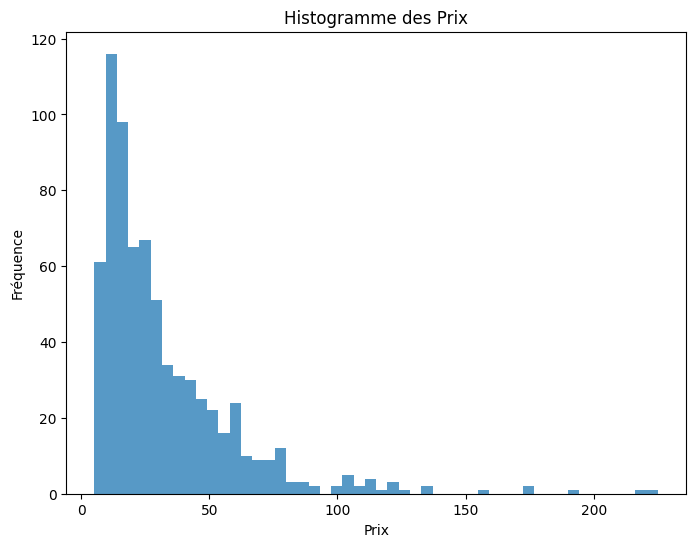

In [234]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?


# Histogramme
plt.figure(figsize=(8, 6))
plt.hist(df_final['price'], bins=50, alpha=0.75)
plt.title('Histogramme des Prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univariée du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivariée  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [277]:
##############################
# Calculer le CA du site web #
##############################

#Créer une colonne calculant le CA par article

#Calculer la somme de la colonne "ca_par_article"
#Ce résultat correspond au chiffre d'affaire du site web
# Créer une colonne pour le chiffre d'affaires par article
df_final['ca_par_article'] = df_final['price'] * df_final['total_sales']

# Calculer la somme de la colonne "ca_par_article" pour obtenir le chiffre d'affaires total
chiffre_affaires_total = df_final['ca_par_article'].sum()

# Afficher le chiffre d'affaires total
print("Chiffre d'affaires total du site web :", chiffre_affaires_total)


Chiffre d'affaires total du site web : 143680.1


In [278]:
###############################
# Palmarès des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge

#Réinitialiser l'index du dataset par un reset_index

#Afficher les 20 premiers articles en CA

#Graphique en barre des 20 premiers articles avec plotly express

# 1. Trier le DataFrame dans l'ordre décroissant du CA
df_final_sorted = df_final.sort_values(by='ca_par_article', ascending=False)

# 2. Réinitialiser l'index du DataFrame trié
df_final_sorted = df_final_sorted.reset_index(drop=True)

# 3. Afficher les 20 premiers articles en CA
top_20_articles = df_final_sorted.head(20)
print("Top 20 articles en termes de chiffre d'affaires :")
print(top_20_articles[['product_id', 'ca_par_article', 'post_title']])

# 4. Créer un graphique en barres des 20 premiers articles avec Plotly Express
fig = px.bar(top_20_articles, x='post_title', y='ca_par_article', title='Top 20 Articles par Chiffre d\'Affaires')
fig.update_layout(xaxis_title='Nom de l\'article', yaxis_title='Chiffre d\'Affaires')

# Afficher le graphique
fig.show()



Top 20 articles en termes de chiffre d'affaires :
    product_id  ca_par_article  \
0         4352          2475.0   
1         5892          1147.8   
2         4353          1113.0   
3         5826           824.0   
4         6212           805.0   
5         5026           781.2   
6         5008           735.0   
7         5767           700.0   
8         6126           675.0   
9         5025           672.0   
10        6201           633.6   
11        4406           628.0   
12        4647           627.0   
13        4358           616.0   
14        4359           599.2   
15        6214           594.0   
16        6202           582.0   
17        4350           556.5   
18        4573           537.6   
19        4402           528.0   

                                           post_title  
0      Champagne Egly-Ouriet Grand Cru Millésimé 2008  
1   Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  
2           Champagne Egly-Ouriet Grand Cru Brut Rosé  
3          

In [279]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA

#Afficher la proportion que représente ce groupe d'articles dans le catalogue entier du site web

# Créer une colonne calculant la part du CA de chaque ligne
df_final['part_ca'] = df_final['ca_par_article'] / chiffre_affaires_total

# Trier le DataFrame par 'ca_par_article' en ordre décroissant
df_final = df_final.sort_values(by='ca_par_article', ascending=False)

# Créer une colonne réalisant la somme cumulative de la part du CA
df_final['part_ca_cumulative'] = df_final['part_ca'].cumsum()

# Calculer le nombre d'articles représentant 80% du CA
nombre_articles_80_pourcent_ca = df_final[df_final['part_ca_cumulative'] <= 0.8].shape[0]

# Afficher la proportion que représente ce groupe d'articles dans le catalogue entier
proportion_articles_80_pourcent_ca = nombre_articles_80_pourcent_ca / df_final.shape[0]

print("Nombre d'articles représentant 80% du CA :", nombre_articles_80_pourcent_ca)
print("Proportion de ces articles dans le catalogue entier :", proportion_articles_80_pourcent_ca)



Nombre d'articles représentant 80% du CA : 434
Proportion de ces articles dans le catalogue entier : 0.6078431372549019


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en quantité</h3>
</div>

In [280]:
#####################################
# Palmarès des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge

#Réinitialiser l'index du dataset par un reset_index

#Afficher les 20 premiers articles en quantité

#Graphique en barre des 20 premiers articles avec plotly express
# 1. Trier le DataFrame dans l'ordre décroissant des quantités vendues
df_sorted_by_quantity = df_final.sort_values(by='total_sales', ascending=False)

# 2. Réinitialiser l'index du DataFrame trié
df_sorted_by_quantity = df_sorted_by_quantity.reset_index(drop=True)

# 3. Afficher les 20 premiers articles en quantité
top_20_articles_by_quantity = df_sorted_by_quantity.head(20)
print("Top 20 articles en termes de quantité vendue :")
print(top_20_articles_by_quantity[['product_id','post_title', 'total_sales']])

# 4. Créer un graphique en barres des 20 premiers articles avec Plotly Express
fig = px.bar(top_20_articles_by_quantity, x='post_title', y='total_sales', title='Top 20 Articles par Quantité Vendue')
fig.update_layout(xaxis_title='nom de l\'article', yaxis_title='Quantité Vendue')

# Afficher le graphique
fig.show()

Top 20 articles en termes de quantité vendue :
    product_id                                         post_title  total_sales
0         4867  Château De La Selve IGP Coteaux de l'Ardèche M...         36.0
1         4203  Mas Laval IGP Pays d'Hérault Les Pampres Blanc...         27.0
2         4275              I Fabbri Chianti Classico Lamole 2017         24.0
3         4726           François Baur Pinot Noir Schlittweg 2017         22.0
4         4647  Bernard Baudry Chinon Rouge La Croix Boissée 2017         22.0
5         6129  Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...         20.0
6         5826              Agnès Levet Côte Rôtie Améthyste 2017         20.0
7         4220  Xavier Frissant Touraine Amboise Chenin Les Pi...         18.0
8         5803               Château Tour Haut-Caussan Médoc 2015         17.0
9         6569               Decelle-Villa Chorey-Lès-Beaune 2016         17.0
10        5778                       Maurel Pays d'Oc Merlot 2018         17.0
11   

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [281]:
######################################
# Calculer le nombre de mois de stock #
######################################

# 1. Créer une colonne pour la rotation de stock (nombre de mois de stock)
df_final['rotation_stock'] = df_final['stock_quantity'] / df_final['total_sales']

# 2. Remplacer les valeurs infinies par 0
df_final['rotation_stock'] = df_final['rotation_stock'].replace(np.inf, 0)

# 3. Trier le DataFrame dans l'ordre décroissant du nombre de mois de stock
df_sorted_by_stock = df_final.sort_values(by='rotation_stock', ascending=False)

# 4. Afficher le top 20 des produits qui ont le plus de mois de stock
top_20_articles_by_stock = df_sorted_by_stock.head(20)
print("Top 20 articles en termes de mois de stock :")
print(top_20_articles_by_stock[['product_id', 'post_title', 'rotation_stock']])

# 5. Créer un graphique en barres des 20 produits ayant le plus de mois de stock
fig = px.bar(top_20_articles_by_stock, x='post_title', y='rotation_stock', title='Top 20 Articles par Mois de Stock')
fig.update_layout(xaxis_title='nom de l\'article', yaxis_title='Mois de Stock')

# Afficher le graphique
fig.show()


Top 20 articles en termes de mois de stock :
     product_id                                         post_title  \
55         4142              Champagne Gosset Grand Millésime 2006   
257        6126             Champagne Gosset Célébris Vintage 2007   
75         4356  Champagne Egly-Ouriet Premier Cru Les Vignes d...   
76         4348     Champagne Egly-Ouriet Grand Cru Brut Tradition   
14         4148               Champagne Mailly Grand Cru Brut Rosé   
38         4357              Champagne Larmandier-Bernier Latitude   
16         4144                        Champagne Gosset Grand Rosé   
150        5025  Champagne Agrapart &amp; Fils L'Avizoise Extra...   
78         4350    Champagne Egly-Ouriet Grand Cru Extra Brut V.P.   
15         4150       Champagne Mailly Grand Cru Intemporelle 2010   
32         4334             Champagne Gosset Grand Blanc de Blancs   
31         4149  Champagne Mailly Grand Cru Intemporelle Rosé 2009   
256        5612  Domaine Weinbach Gewurztrami

In [282]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros

#Calculer la somme de la colonne "Valorisation_stock_euros"

# 1. Créer une colonne pour la valorisation des stocks en euros
df_final['valorisation_stock_euros'] = df_final['stock_quantity'] * df_final['price']

# 2. Calculer la somme de la colonne "valorisation_stock_euros"
valorisation_totale = df_final['valorisation_stock_euros'].sum()

# Afficher la valorisation totale des stocks en euros
print("Valorisation totale des stocks en euros :", valorisation_totale)

Valorisation totale des stocks en euros : 494637.9


In [283]:
##############################################
# Valorisation du nombre de produits en stock #
##############################################

#Calculer la somme de la colonne stock quantity

# Calculer la somme de la colonne "stock_quantity"
quantite_totale_en_stock = df_final['stock_quantity'].sum()

# Afficher la quantité totale de produits en stock
print("Quantité totale de produits en stock :", quantite_totale_en_stock)

Quantité totale de produits en stock : 16740


In [301]:
# Calculer un score pour chaque article (exemple simple : produit du CA et de la rotation des stocks)
df_final['score'] = df_final['ca_par_article'] * df_final['rotation_stock']

# Trier les articles par score décroissant et sélectionner le top 20
top_20_articles = df_final.sort_values(by='score', ascending=False).head(20)

# Créer le graphique à barres avec Plotly Express
fig = px.bar(top_20_articles, x='post_title', y='score', title='Top 20 des Articles à Surveiller', labels={'post_title': 'nom du Produit', 'score': 'Score'})

# Afficher le graphique
fig.show()

In [304]:
# Filtrer les produits qui ne font aucun chiffre d'affaires mais qui ont une quantité en stock non nulle
produits_sans_ca_avec_stock = df_final[(df_final['ca_par_article'] == 0) & (df_final['stock_quantity'] != 0)]

# Afficher les produits sans CA mais avec stock
print(produits_sans_ca_avec_stock)

    product_id  onsale_web  price  stock_quantity stock_status  \
79        4355           1  12.65              97      instock   
26        4337           1  83.00             145      instock   
3         5932           1  59.90              13      instock   

    purchase_price id_web _merge    sku  total_sales  ...  \
79           77.48  12589   both  12589          0.0  ...   
26           48.90   4679   both   4679          0.0  ...   
3            27.18    523   both    523          0.0  ...   

                                        post_title product_type   z_score  \
79  Champagne Egly-Ouriet Grand Cru Blanc de Noirs    Champagne -0.713772   
26   Champagne Mailly Grand Cru Les Echansons 2007    Champagne  1.837267   
3                     Cognac Normandin Mercier VFC       Cognac  0.999613   

   ca_par_article  part_ca  part_ca_cumulative  rotation_stock  \
79            0.0      0.0                 1.0             0.0   
26            0.0      0.0                 1.0   

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [227]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne Prix HT

#Création de la colonne Taux de marge

#Afficher le prix minimum de la colonne "taux_marge"

#Afficher le prix maximum de la colonne "taux_marge"

# 2. Créer une colonne pour le Taux de marge
df_final['taux_marge'] = (((df_final['price'] - df_final['purchase_price']) / df_final['price']) * 100).round(2)

# 3. Afficher le taux de marge minimum et maximum
taux_marge_minimum = df_final['taux_marge'].min()
taux_marge_maximum = df_final['taux_marge'].max()

print("Taux de marge minimum :", taux_marge_minimum)
print("Taux de marge maximum :", taux_marge_maximum)



Taux de marge minimum : -512.49
Taux de marge maximum : 56.46


In [ ]:
calcul du prix hors taxe
diviser le prix / 1,20

In [228]:
#Affichage de la ligne avec un taux de marge inférieur à 0
# Filtrer le DataFrame pour obtenir les lignes où le taux de marge est inférieur à 0
df_negative_margin = df_final[df_final['taux_marge'] < 0]

# Afficher les lignes avec un taux de marge inférieur à 0
print("Lignes avec un taux de marge inférieur à 0 :")
print(df_negative_margin)


Lignes avec un taux de marge inférieur à 0 :
    product_id  onsale_web  price  stock_quantity stock_status  \
79        4355           1  12.65              97      instock   

    purchase_price id_web _merge    sku  total_sales  ... post_type  \
79           77.48  12589   both  12589          0.0  ...   product   

                                        post_title product_type   z_score  \
79  Champagne Egly-Ouriet Grand Cru Blanc de Noirs    Champagne -0.713772   

    ca_par_article  part_ca  part_ca_cumulative  rotation_stock  \
79             0.0      0.0                 1.0             0.0   

    valorisation_stock_euros  taux_marge  
79                   1227.05     -512.49  

[1 rows x 21 columns]


In [229]:
#Création d'un dataframe avec les taux positifs

#Afficher le prix minimum de la colonne "taux_marge"

#Afficher le prix maximum de la colonne "taux_marge"
# Créer un DataFrame avec les taux de marge positifs
df_taux_positifs = df_final[df_final['taux_marge'] > 0]

# Afficher le prix minimum de la colonne "taux_marge" pour les taux positifs
taux_marge_minimum_positif = df_taux_positifs['taux_marge'].min()
print("Taux de marge minimum (positif) :", taux_marge_minimum_positif)

# Afficher le prix maximum de la colonne "taux_marge" pour les taux positifs
taux_marge_maximum_positif = df_taux_positifs['taux_marge'].max()
print("Taux de marge maximum (positif) :", taux_marge_maximum_positif)


Taux de marge minimum (positif) : 35.65
Taux de marge maximum (positif) : 56.46


In [230]:
#Création d'un dataframe avec le taux de marge moyen par type de produit

#Affichage dans un graphique du taux de marge par type de produit


# 1. Créer un DataFrame avec le taux de marge moyen par type de produit
df_taux_marge_moyen = df_final.groupby('product_type')['taux_marge'].mean().reset_index()

# 2. Afficher le taux de marge moyen par type de produit dans un graphique
fig = px.bar(df_taux_marge_moyen, x='product_type', y='taux_marge', title='Taux de Marge Moyen par Type de Produit')
fig.update_layout(xaxis_title='Type de Produit', yaxis_title='Taux de Marge Moyen')

# Afficher le graphique
fig.show()



In [323]:
#etudier la variation des stocks
df_final['variation_stock'] = df_final['stock_quantity'] - df_final['total_sales']

# Calculer le nombre total de bouteilles vendues
tt_btl_vendues = df_final['total_sales'].sum()
# Calculer le total des prix d'achat
total_purchase_price = df_final['purchase_price'].sum()

# Calculer le total des prix de vente
total_price = df_final['price'].sum()

# Afficher les résultats
print(f"Le total des prix d'achat est : {total_purchase_price}")
print(f"Le total des prix de vente est : {total_price}")
print(f"Le nombre total de bouteilles vendues est : {tt_btl_vendues}")


# Afficher le DataFrame avec la nouvelle colonne
print(df_final)

Le total des prix d'achat est : 12069.46
Le total des prix de vente est : 23086.25
Le nombre total de bouteilles vendues est : 5751.0
     product_id  onsale_web  price  stock_quantity stock_status  \
567        4352           1  225.0               0   outofstock   
269        5892           1  191.3              98      instock   
77         4353           1   79.5             127      instock   
349        5826           1   41.2              34      instock   
157        6212           1  115.0              16      instock   
..          ...         ...    ...             ...          ...   
244        5544           1   61.6               0   outofstock   
680        4876           1   22.8               0   outofstock   
183        4618           1   30.6               0   outofstock   
692        4198           1    5.8               0   outofstock   
3          5932           1   59.9              13      instock   

     purchase_price id_web _merge    sku  total_sales  ... pr

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des corrélations entre les variables stock, sales et price</h3>
</div>

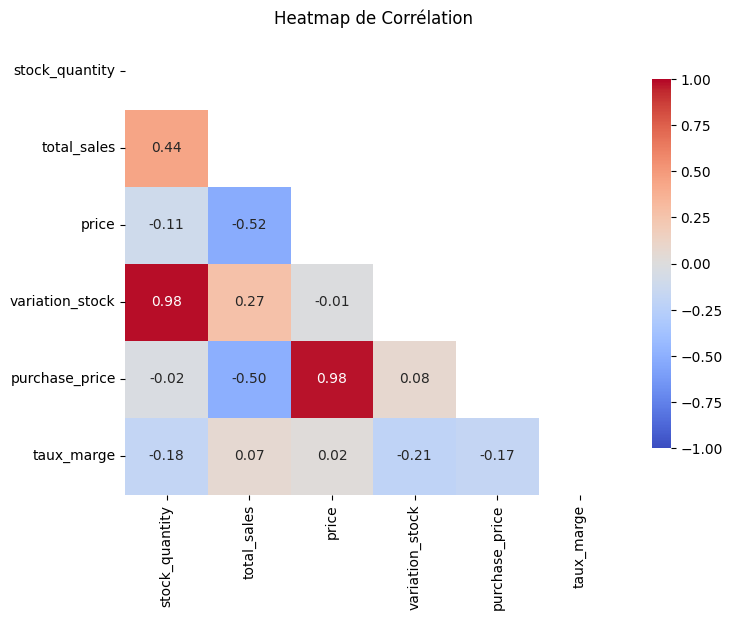

In [327]:
# Sélectionner les colonnes d'intérêt
columns_of_interest = ['stock_quantity', 'total_sales', 'price', 'variation_stock', 'purchase_price', 'taux_marge']
df_correlation = df_final[columns_of_interest]

# Calculer la matrice de corrélation
corr_matrix = df_correlation.corr()

# Créer un masque pour la moitié supérieure de la heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configurer la taille de la figure
plt.figure(figsize=(8, 6))

# Créer une heatmap de corrélation avec le masque
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=-1, vmax=1)

# Ajouter un titre
plt.title('Heatmap de Corrélation')

# Afficher la heatmap
plt.show()

In [232]:
#Que peut-on conclure des corrélations ?
# Les ventes sont modérément influencées par le stock disponible et, de manière plus prononcée, par le prix.
# Une augmentation du stock peut légèrement stimuler les ventes.
# Une diminution du prix est associée à une augmentation des ventes, ce qui est une observation typique du marché.
# La quantité de stock n'est pas fortement liée au prix.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mise à disposition de la nouvelle table sur un fichier Excel</h3>
</div>

In [310]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut être utile pour partager le résultat du dataset obtenu avec les équipes.  
# Définir le nom du fichier Excel de sortie
nom_fichier_excel = 'df_final.xlsx'

# Exporter le DataFrame df_merge vers un fichier Excel
df_merge.to_excel(nom_fichier_excel, index=False)

print(f"Le DataFrame a été exporté vers {nom_fichier_excel} avec succès.")


Le DataFrame a été exporté vers df_final.xlsx avec succès.
